Importing Sklearn Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For conversion of categorical values to numerical
from sklearn.preprocessing import LabelEncoder

# For splitting and standardizing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Regression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# For evaluation of regression models
from sklearn import metrics

# for warnings
import warnings
warnings.filterwarnings("ignore")

Importing the train and test dataset

In [234]:
train_df = pd.read_csv('../input/used-cars-price-prediction/train-data.csv')
print("Train_df Shape = ", train_df.shape)
train_df.head()

Train_df Shape =  (6019, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [235]:
test_df = pd.read_csv('../input/used-cars-price-prediction/test-data.csv')
print('Test_df Shape = ', test_df.shape)
test_df.head()

Test_df Shape =  (1234, 13)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


DATA CLEANING PROCESS

In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [7]:
train_df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
test_df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [106]:
def remove_space(x):
    tokens = str(x).split(' ')
    if len(tokens) == 2:
        return tokens[0]


In [107]:
train_df['Mileage'] = train_df['Mileage'].apply(remove_space).astype(float)
train_df['Engine'] = train_df['Engine'].apply(remove_space)
train_df['Power'] = train_df['Power'].apply(remove_space)

In [108]:
test_df['Mileage'] = test_df['Mileage'].apply(remove_space)
test_df['Engine'] = test_df['Engine'].apply(remove_space)
test_df['Power'] = test_df['Power'].apply(remove_space)

In [109]:
train_df['Mileage'].value_counts().head()

17.00    173
18.90    172
18.60    119
20.36     88
21.10     87
Name: Mileage, dtype: int64

In [110]:
train_df['Mileage'].isnull().sum()

2

In [111]:
train_df['Mileage'] = train_df['Mileage'].fillna(17)

In [112]:
train_df['Engine'].value_counts().head()

1197    606
1248    512
1498    304
998     259
2179    240
Name: Engine, dtype: int64

In [113]:
train_df['Engine'].isnull().sum()

36

In [114]:
train_df['Engine'] = train_df['Engine'].fillna(1197)

In [115]:
train_df['Power'].isnull().sum()

36

In [116]:
train_df['Power'].value_counts()

74        235
98.6      131
73.9      125
140       123
78.9      111
         ... 
488.1       1
402         1
181.43      1
68.1        1
161.6       1
Name: Power, Length: 372, dtype: int64

In [117]:
train_df['Power'] = train_df['Power'].fillna('74')

In [118]:
train_df['Power'].isnull().sum()

0

In [119]:
train_df['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [120]:
train_df['Seats'].isnull().sum()

42

In [121]:
train_df['Seats'] = train_df['Seats'].fillna(5.0)

In [122]:
train_df = train_df.drop(['New_Price', 'Unnamed: 0'], axis = 'columns')

In [123]:
(train_df['Power'] == 'null').value_counts()

False    5912
True      107
Name: Power, dtype: int64

In [124]:
train_df['Power'] = train_df['Power'].replace('null', '0')

In [125]:
test_df = test_df.drop(['New_Price', 'Unnamed: 0'], axis = 'columns')

In [126]:
(test_df['Power'] == 'null').value_counts()

False    1212
True       22
Name: Power, dtype: int64

In [127]:
test_df['Power'] = test_df['Power'].replace('null', '0')

In [128]:
test_df['Engine'].value_counts()

1197    126
1248     98
1498     66
1198     54
998      50
       ... 
2147      1
2198      1
3696      1
1193      1
2696      1
Name: Engine, Length: 104, dtype: int64

In [129]:
test_df['Engine'].isnull().sum()

10

In [130]:
test_df['Engine'] = test_df['Engine'].fillna(1197)

In [131]:
test_df['Power'].isnull().sum()

10

In [132]:
test_df['Power'].value_counts()

74        45
98.6      35
73.9      27
82        23
0         22
          ..
120.69     1
246.7      1
192        1
241.6      1
185        1
Name: Power, Length: 249, dtype: int64

In [133]:
test_df['Power'] = test_df['Power'].fillna('74')

In [134]:
test_df['Seats'].isnull().sum()

11

In [135]:
test_df['Seats'].value_counts()

5.0     1033
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [136]:
test_df['Seats'] = test_df['Seats'].fillna(5.0)

In [137]:
test_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [138]:
train_df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [139]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74


In [140]:
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,0,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


" Inter Quantile Range " technique is used for determining outliers in the dataset and for removing it.

After calculating lower limit and upper limit, the values before upper limit and the values after lower limit

will be used for prediction purpose

In [141]:
train_df.describe()

,Year,Kilometers_Driven,Mileage,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134584,5.276790,9.479468
std,3.269742,9.126884e+04,4.581574,0.806346,11.187917
min,1998.000000,1.710000e+02,0.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,10.000000,160.000000


In [142]:
IQR = train_df.Year.quantile(0.75) - train_df.Year.quantile(0.25)                       # IQR : Inter Quantile Range
IQR 

5.0

In [143]:
lower_limit = train_df.Year.quantile(0.25) - (1.5*IQR)
upper_limit = train_df.Year.quantile(0.75) + (1.5*IQR)

upper_limit, lower_limit

(2023.5, 2003.5)

In [144]:
train_df[(train_df.Year > lower_limit) | (train_df.Year < upper_limit)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.1,5.0,2.65


In [145]:
train_df_no_outliers = train_df[(train_df.Year > lower_limit) & (train_df.Year < upper_limi)]
train_df_no_outliers

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.1,5.0,2.65


Histogram plot for train_df_no_outliers['Year'].

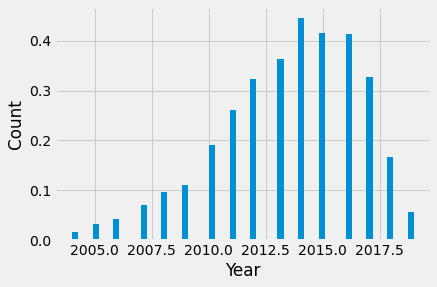

In [146]:
plt.hist(train_df_no_outliers.Year, bins = 50, density = True, rwidth = 0.9)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

IQR method for determining and removing outliers in test_df dataset.

In [147]:
test_df.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,5.282010
std,3.179700,35598.702098,0.822366
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [148]:
IQR_test = test_df.Year.quantile(0.75) - test_df.Year.quantile(0.25)
IQR_test

5.0

In [149]:
lower_limit_test = train_df.Year.quantile(0.25) - (1.5*IQR)
upper_limit_test = train_df.Year.quantile(0.75) + (1.5*IQR)

upper_limit_test, lower_limit_test

(2023.5, 2003.5)

In [150]:
test_df[(test_df.Year > lower_limit_test) | (test_df.Year < upper_limit_test)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,0,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0


Removal of the outliers from test_df dataset

In [151]:
test_df_no_outliers = test_df[(test_df.Year > lower_limit_test) | (test_df.Year < upper_limit_test)]

In [231]:
test_df_no_outliers

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2014,274,0,1,0,291,998,164,1,369.74
1,2013,384,3,1,2,270,796,155,2,257.54
2,2017,211,1,1,0,52,2393,66,4,659.00
3,2012,723,1,1,0,258,1364,0,2,217.36
4,2014,161,3,1,0,164,1197,212,2,123.02
...,...,...,...,...,...,...,...,...,...,...
1229,2011,640,1,1,0,208,1598,10,2,222.15
1230,2015,430,3,0,0,134,1197,10,2,668.55
1231,2012,155,1,1,0,252,1461,170,2,434.18
1232,2013,366,3,0,3,133,1197,10,2,468.56


Histogram plot for  test_df_no_outliers['Year']. 

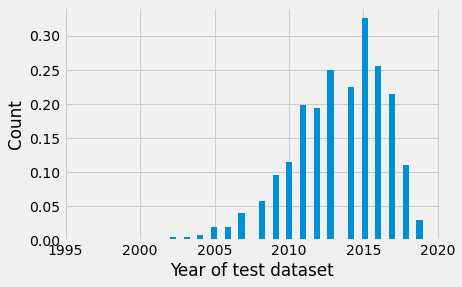

In [153]:
plt.hist(test_df_no_outliers.Year, bins = 50, density = True, rwidth = 0.9)
plt.xlabel('Year of test dataset')
plt.ylabel('Count')
plt.show()

**For converting float and string values into int values using " LabelEncoder " technique**

In [154]:
encoder = LabelEncoder()

In [155]:
train_df_no_outliers['Name'] = encoder.fit_transform(train_df_no_outliers['Name'])
train_df_no_outliers['Location'] = encoder.fit_transform(train_df_no_outliers['Location'])
train_df_no_outliers['Fuel_Type'] = encoder.fit_transform(train_df_no_outliers['Fuel_Type'])
train_df_no_outliers['Transmission'] = encoder.fit_transform(train_df_no_outliers['Transmission'])
train_df_no_outliers['Owner_Type'] = encoder.fit_transform(train_df_no_outliers['Owner_Type'])
train_df_no_outliers['Kilometers_Driven'] = encoder.fit_transform(train_df_no_outliers['Kilometers_Driven'])

In [156]:
test_df_no_outliers['Name'] = encoder.fit_transform(test_df_no_outliers['Name'])
test_df_no_outliers['Location'] = encoder.fit_transform(test_df_no_outliers['Location'])
test_df_no_outliers['Fuel_Type'] = encoder.fit_transform(test_df_no_outliers['Fuel_Type'])
test_df_no_outliers['Transmission'] = encoder.fit_transform(test_df_no_outliers['Transmission'])
test_df_no_outliers['Owner_Type'] = encoder.fit_transform(test_df_no_outliers['Owner_Type'])
test_df_no_outliers['Kilometers_Driven'] = encoder.fit_transform(test_df_no_outliers['Kilometers_Driven'])

In [157]:
train_df_no_outliers['Power'] = encoder.fit_transform(train_df_no_outliers['Power'])
test_df_no_outliers['Power'] = encoder.fit_transform(test_df_no_outliers['Power'])

In [158]:
train_df_no_outliers['Mileage'] = encoder.fit_transform(train_df_no_outliers['Mileage'])
train_df_no_outliers['Seats'] = encoder.fit_transform(train_df_no_outliers['Seats'])

In [159]:
test_df_no_outliers['Mileage'] = encoder.fit_transform(test_df_no_outliers['Mileage'])
test_df_no_outliers['Seats'] = encoder.fit_transform(test_df_no_outliers['Seats'])

In [160]:
train_df_no_outliers['Price'] = encoder.fit_transform(train_df_no_outliers['Price'])

Dropping of Name and Location column

In [161]:
train_df_no_outliers = train_df_no_outliers.drop(['Name', 'Location'], axis = 'columns')

In [162]:
test_df_no_outliers = test_df_no_outliers.drop(['Name', 'Location'], axis = 'columns')

**FINAL   " train_df_no_outliers " and " test_df_no_outliers " dataset.**

In [163]:
train_df_no_outliers.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,2359,0,1,0,414,998,260,3,53
1,2015,1128,1,1,0,291,1582,57,3,797
2,2011,1356,4,1,0,249,1199,344,3,269
3,2012,2690,1,1,0,323,1248,346,5,395
4,2013,1120,1,0,2,155,1968,77,3,943


In [164]:
test_df_no_outliers.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2014,274,0,1,0,291,998,164,1
1,2013,384,3,1,2,270,796,155,2
2,2017,211,1,1,0,52,2393,66,4
3,2012,723,1,1,0,258,1364,0,2
4,2014,161,3,1,0,164,1197,212,2


**Visualization regarding train_df_no_outliers dataset, for better understanding of the dataset.**

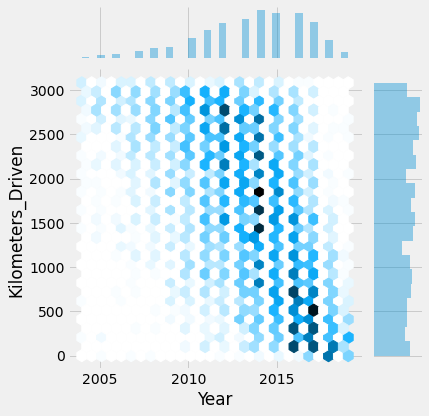

In [165]:
sns.jointplot(x = 'Year', y = 'Kilometers_Driven', kind = 'hex', data = train_df_no_outliers)

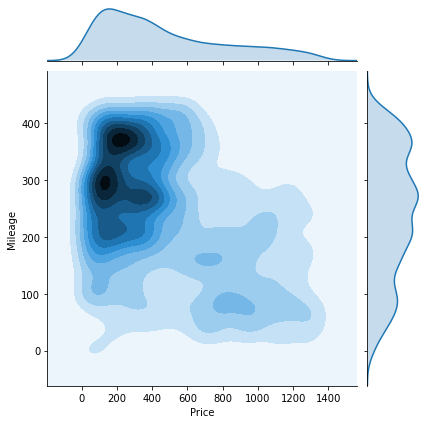

In [70]:
sns.jointplot(x = 'Price', y = 'Mileage', kind = 'kde', data = train_df_no_outliers)

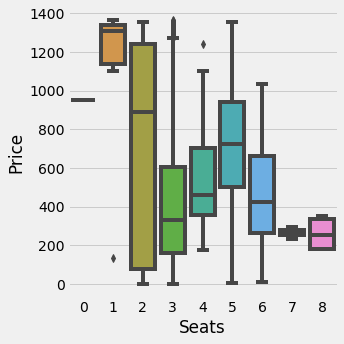

In [166]:
sns.catplot(x = 'Seats', y = 'Price', kind = 'box', data = train_df_no_outliers)

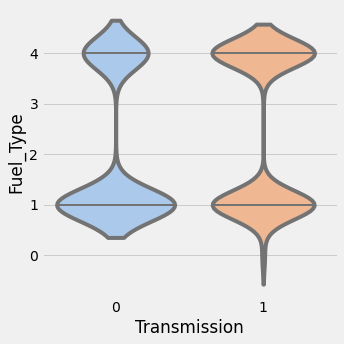

In [167]:
sns.catplot(x = 'Transmission', y = 'Fuel_Type', kind = 'violin', data = train_df_no_outliers,inner="stick", split=True,
            palette="pastel");

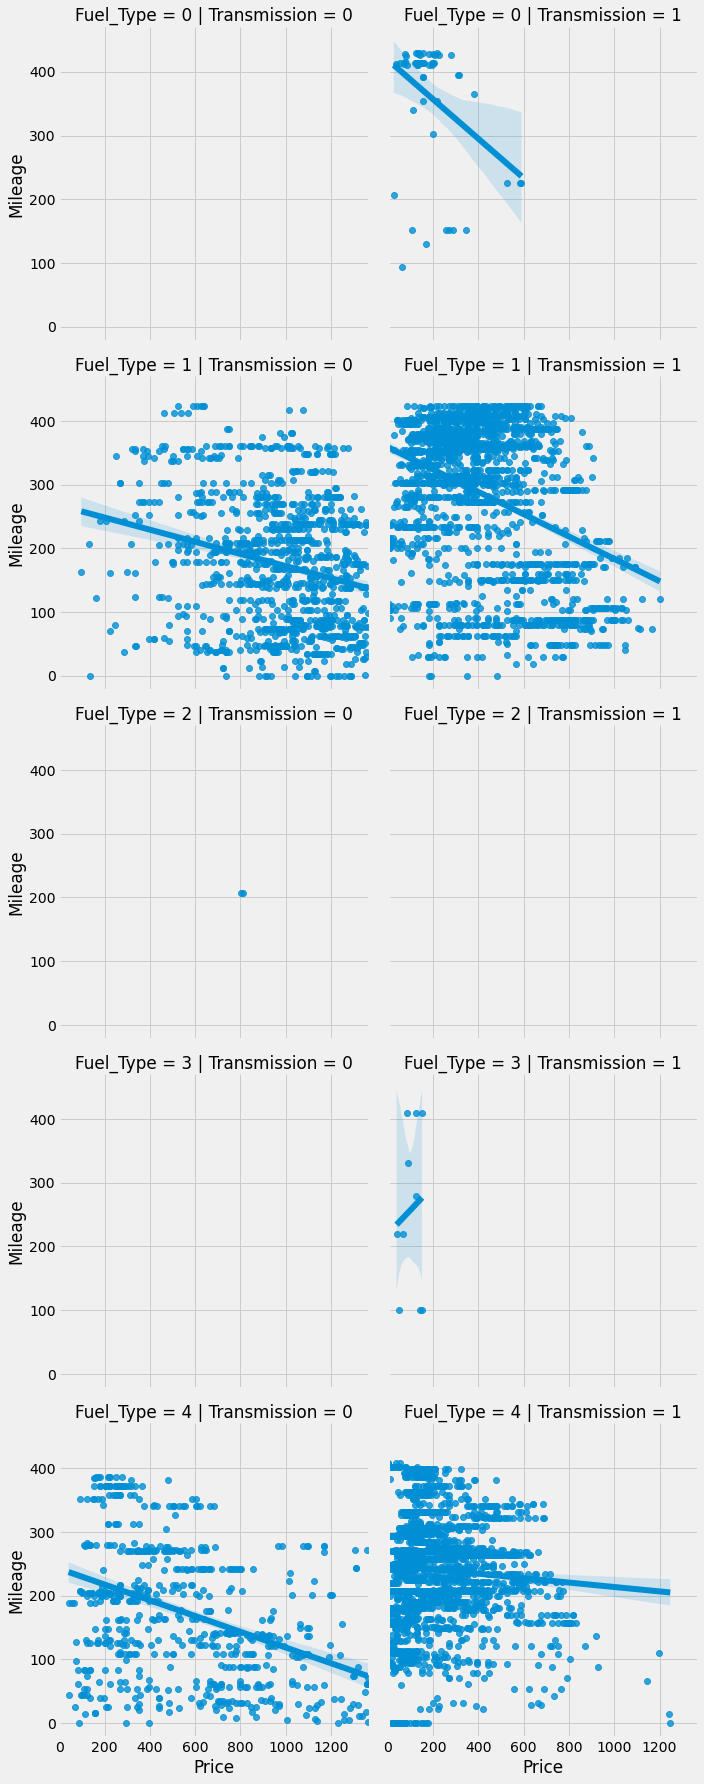

In [168]:
sns.lmplot(x="Price", y="Mileage",
           col="Transmission", row="Fuel_Type", data=train_df_no_outliers);

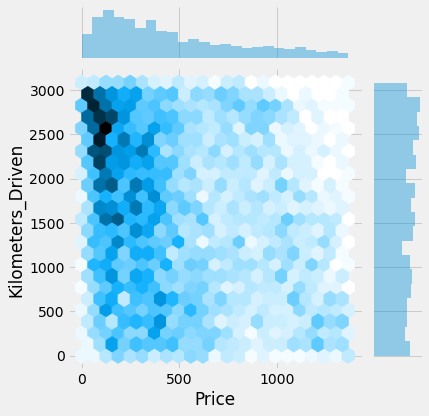

In [169]:
sns.jointplot(x="Price", y="Kilometers_Driven",kind = 'hex', data=train_df_no_outliers);

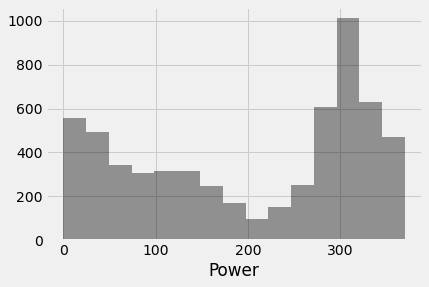

In [170]:
sns.distplot(train_df_no_outliers.Power, kde = False, color = 'black')

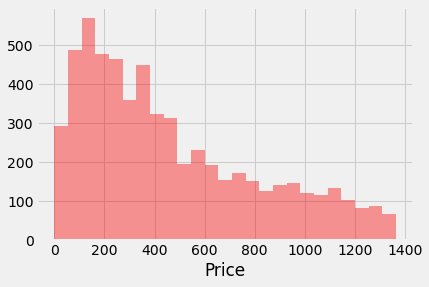

In [171]:
sns.distplot(train_df_no_outliers.Price, kde = False, color = 'red')

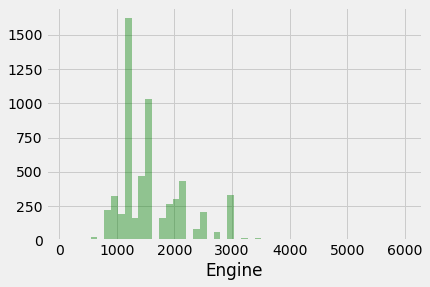

In [172]:
sns.distplot(train_df_no_outliers.Engine, kde = False, color = 'green')

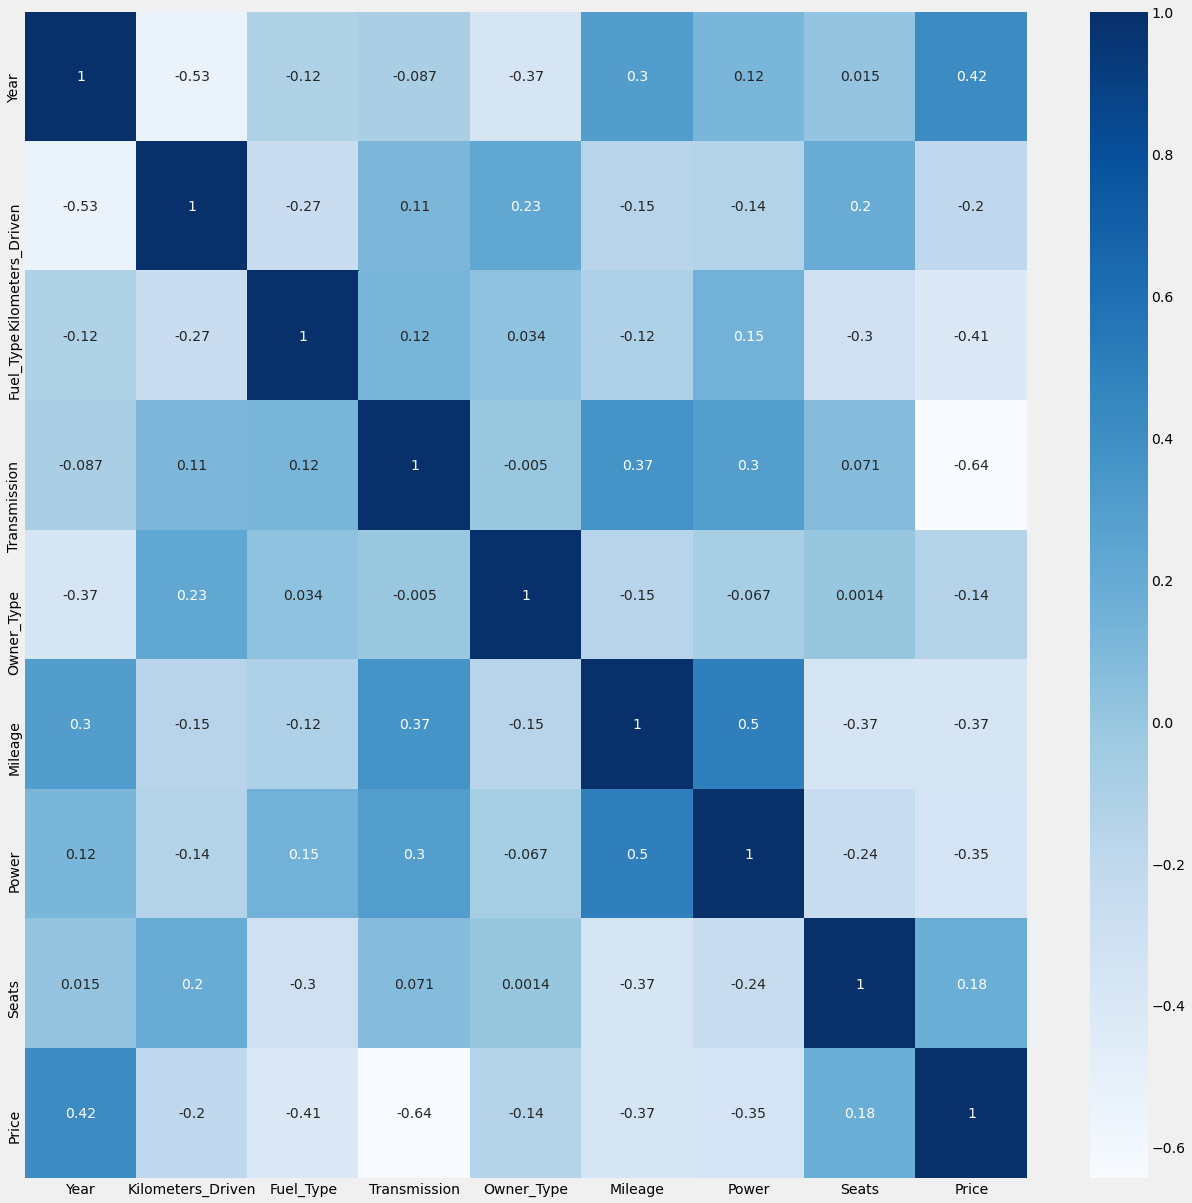

In [173]:
plt.figure(figsize = (20,20))
g = sns.heatmap(train_df_no_outliers.corr(), annot = True, cmap = 'Blues')
g

**Visualization for " test_df_no_outliers " dataset**

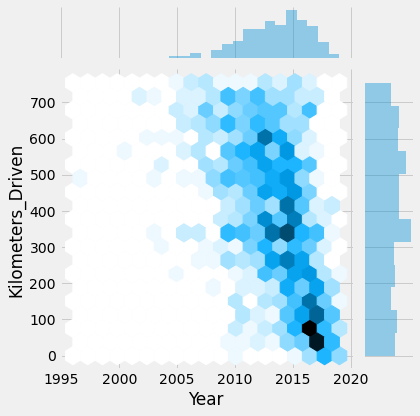

In [174]:
sns.jointplot(x = 'Year', y = 'Kilometers_Driven', kind = 'hex', data = test_df_no_outliers)

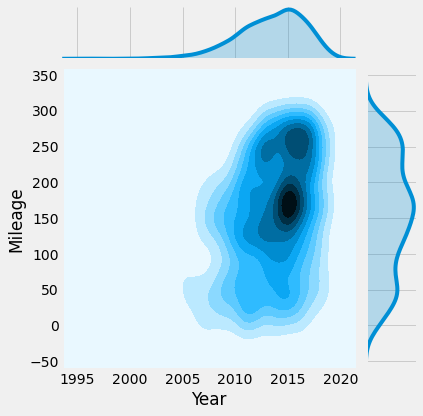

In [175]:
sns.jointplot(x = 'Year', y = 'Mileage', kind = 'kde', data = test_df_no_outliers)

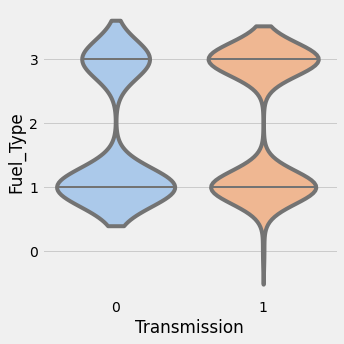

In [176]:
sns.catplot(x = 'Transmission', y = 'Fuel_Type', kind = 'violin', data = test_df_no_outliers,inner="stick", split=True,
            palette="pastel");

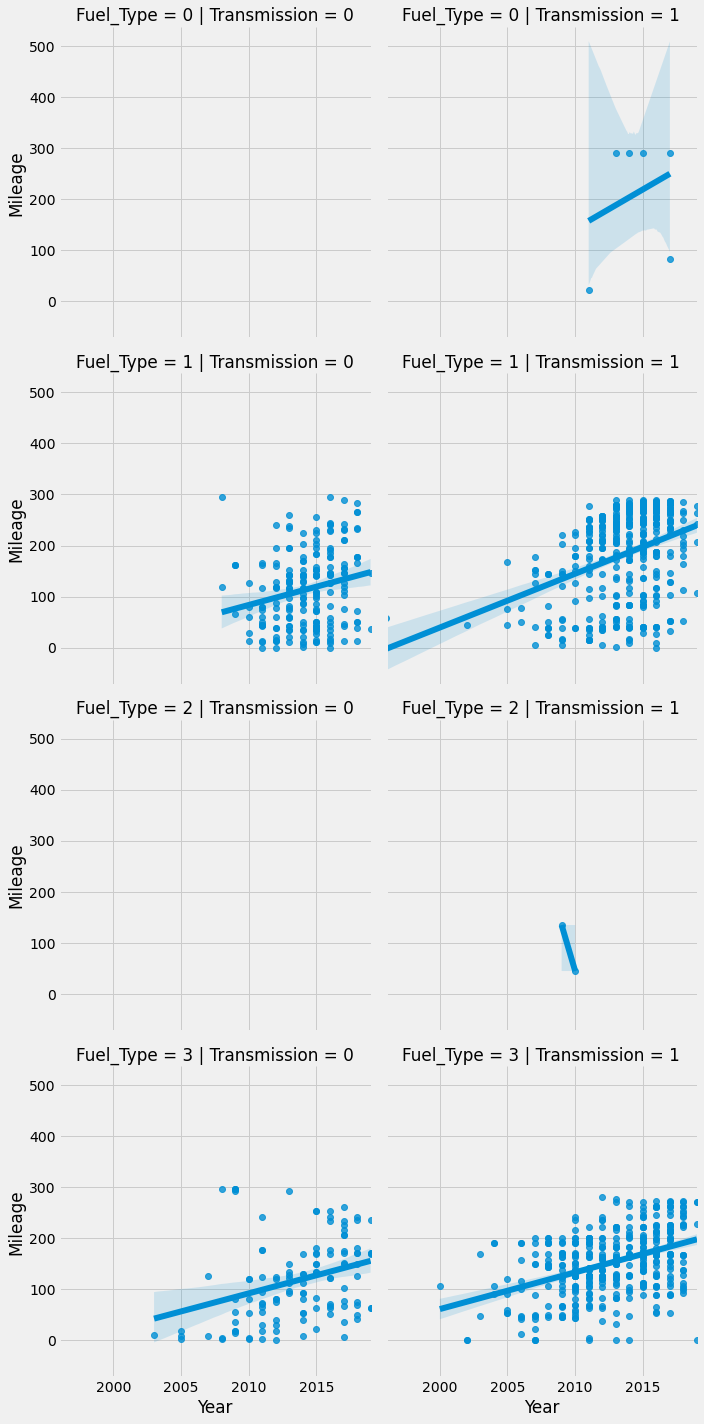

In [178]:
sns.lmplot(x="Year", y="Mileage",
           col="Transmission", row="Fuel_Type", data=test_df_no_outliers);

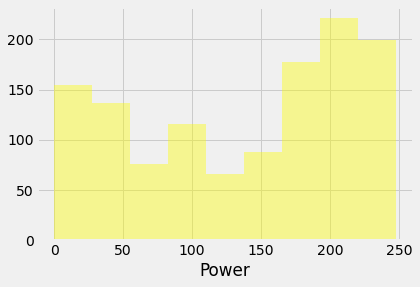

In [182]:
sns.distplot(test_df_no_outliers.Power, kde = False, color = 'yellow')

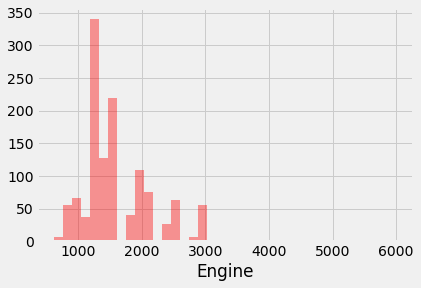

In [180]:
sns.distplot(test_df_no_outliers.Engine, kde = False, color = 'red')

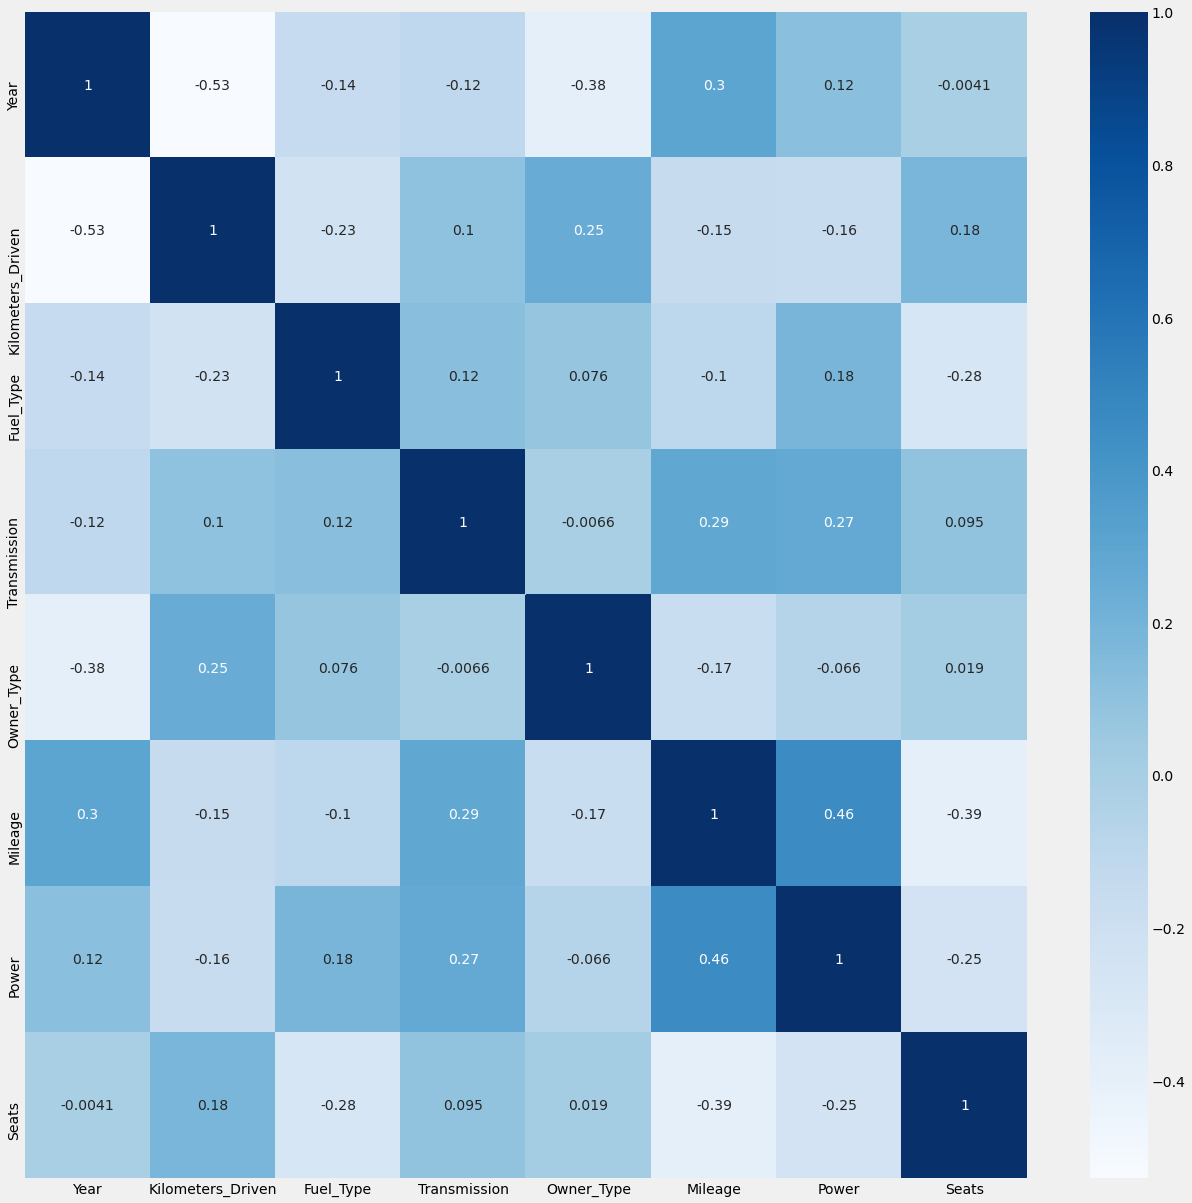

In [181]:
plt.figure(figsize = (20,20))
g = sns.heatmap(test_df_no_outliers.corr(), annot = True, cmap = 'Blues')
g

**I have splitted the train dataset into " X " and " y ".

 " y " contains dependent column, that is Price column.
 
 " X " contains all the columns except Price column**

In [183]:
y = np.array(train_df_no_outliers['Price'])
y = y.reshape(-1,1)

In [184]:
X = train_df_no_outliers.iloc[:, train_df_no_outliers.columns != 'Price']

**The final " X " dataset,  which contains independent columns only.**

In [185]:
X.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2010,2359,0,1,0,414,998,260,3
1,2015,1128,1,1,0,291,1582,57,3
2,2011,1356,4,1,0,249,1199,344,3
3,2012,2690,1,1,0,323,1248,346,5
4,2013,1120,1,0,2,155,1968,77,3


I have used " train_test_split " for splitting of the " train_df_no_outliers " dataset.


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3879, 9) (3879, 1)
(2090, 9) (2090, 1)


**Since the target column contains continuous values,  I have used different types of " Regression " technique 
for prediction purpose.**

**Ridge Regression**

In [187]:
ridge = Ridge()

In [188]:
ridge.fit(X_train, y_train)

Ridge()

In [189]:
ridge.score(X_test, y_test)

0.8269121285300789

In [190]:
ridge_score = round((ridge.score(X_test, y_test))*100, 3)
ridge_score

82.691

Lasso Regression

In [191]:
lasso = Lasso()

In [192]:
lasso.fit(X_train, y_train)

Lasso()

In [193]:
lasso.score(X_test, y_test)

0.8266570219607529

In [194]:
lasso_score = round((lasso.score(X_test, y_test))*100, 3)
lasso_score

82.666

**Linear Regression**

In [195]:
linear = LinearRegression()

In [196]:
linear.fit(X_train, y_train)

LinearRegression()

In [197]:
linear.score(X_test, y_test)

0.8269142858419122

In [198]:
linear_score = round((linear.score(X_test, y_test))*100, 3)
linear_score

82.691

**Random Forest Regressor**

In [199]:
rfr = RandomForestRegressor()

In [200]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [201]:
rfr.score(X_test, y_test)

0.9331447610934649

In [202]:
rfr_score = round((rfr.score(X_test, y_test))*100, 3)
rfr_score

93.314

**Decision Tree Regressor**

In [203]:
dtr = DecisionTreeRegressor()

In [204]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [205]:
dtr.score(X_test, y_test)

0.8870179467356155

In [206]:
dtr_score = round((dtr.score(X_test, y_test))*100, 3)
dtr_score

88.702

In [207]:

models = pd.DataFrame({ 
    'Model': ['Random Forest Regressor', 'Decision Tree Regressor','Lasso Regression',
             'Ridge Regression', 'Linear Regression'],
    'Score': [rfr_score, dtr_score, lasso_score,
              ridge_score, linear_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest Regressor,93.314
1,Decision Tree Regressor,88.702
3,Ridge Regression,82.691
4,Linear Regression,82.691
2,Lasso Regression,82.666


**From the above model dataframe, we can see that Random forest regressor gives the best score for prediction. 
So, I am going to use Random forest regressor as my model.**

In [223]:
y_predicted = rfr.predict(X_test)
y_predicted

array([729.96, 145.03, 599.76, ..., 545.4 , 186.08, 210.35])

Plot between True value i.e, y_test and y_predicted

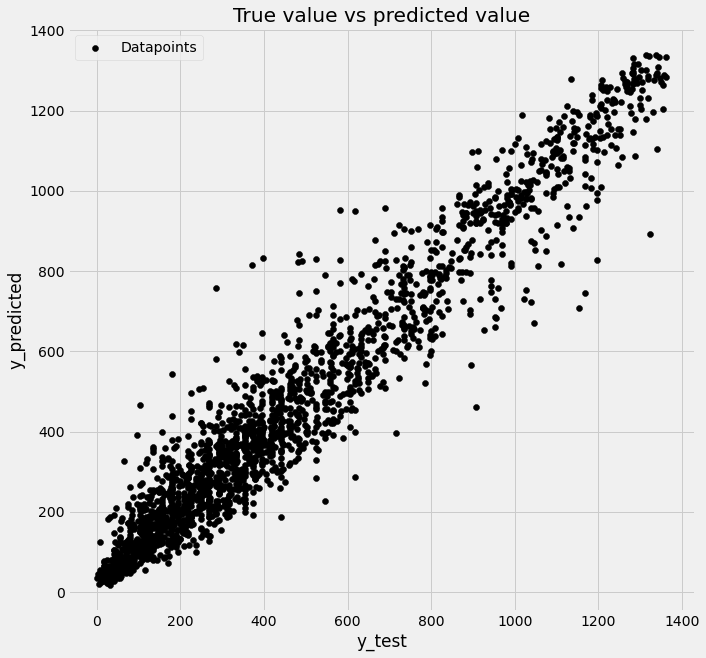

In [227]:
plt.figure(figsize = (10,10))

plt.scatter(y_test, y_predicted, color = 'black', label = "Datapoints")

plt.ylabel('y_predicted')
plt.xlabel('y_test')

plt.title('True value vs predicted value')

plt.grid(True)

plt.style.use('fivethirtyeight')

plt.legend()

**Price column for the dataframe test_df_no_outliers is created.
Which contains the result of prediction, of " test_df_no_outliers " dataset using Random forest regressor**

In [210]:
test_df_no_outliers['Price'] = rfr.predict(test_df_no_outliers)
test_df_no_outliers['Price'].head(10)

0     369.740
1     257.540
2     659.000
3     217.360
4     123.020
5     597.145
6    1007.970
7     266.100
8     249.200
9     656.040
Name: Price, dtype: float64

R2_score stands for " R Squared "

MAE stands for " Mean absolute error "

EVS stands for " Explained_variance_score "

In [222]:
print('r2_score = ', round(metrics.r2_score(y_test, y_predicted)*100, 5))
print('MAE = ', metrics.mean_absolute_error(y_test, y_predicted))
print('EVS = ',round(metrics.explained_variance_score(y_test, y_predicted)*100, 5))

r2_score =  93.31448
MAE =  65.43569065276829
EVS =  93.31467


R score of 0.9331448 means that 93 % of variability in the data can be explained by the model.

explained variance score = 1 - ( var { y - y' } / var{ y } )

MAE = ( 1 / n ) summation( y - y' ) from 0 to n-1